# Wstępne przetwarzanie danych w Pythonie

W ćwiczeniu zapoznamy się z najprostszymi sposobami przetwarzania danych (normalizacja, one-hot-encoding, binaryzacja) danych przy wykorzystaniu biblioteki `scikit-learn` i `pandas`.

In [93]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing

## Irysy Fishera

Funkcja `load_iris()` utworzy obiekt zawierający słynny zbiór danych o [irysach Fischera](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [28]:
iris = datasets.load_iris()

print('Nazwy atrybutów: ', iris.feature_names)
print('Klasy decyzyjne: ', iris.target_names)

print('kształt danych: ', iris.data.shape)
print('kształt etykiety: ', iris.target.shape)

Nazwy atrybutów:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Klasy decyzyjne:  ['setosa' 'versicolor' 'virginica']
kształt danych:  (150, 4)
kształt etykiety:  (150,)


W ćwiczeniu wykorzystamy bibliotekę [pandas](https://pandas.pydata.org) do przechowywania danych i wyników pośrednich obliczeń. Pandas to specjalizowana biblioteka która bardzo dobrze współpracuje z bibliotekami [Numerical Python](http://www.numpy.org) oraz [SciKit Learn](http://scikit-learn.org), głównym narzędziem do eksploracji danych i uczenia maszynowego. Jeśli nigdy nie pracowaliście z `pandas` to warto rzucić okiem na krótkie wprowadzenia, np. [tutaj](https://medium.com/@wbusaka/a-gentle-introduction-to-pandas-5ed17421a59d), [tutaj](https://towardsdatascience.com/an-introduction-to-pandas-in-python-b06d2dd51aba) lub [tutaj](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)

In [54]:
# utworzenie nowego obiektu DataFrame
df = pd.DataFrame(iris.data)

# dodanie nowej kolumny
df['target'] = iris.target

# redefinicja nazw kolumn
df.columns = iris.feature_names + ['target']

df.head(n=10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

Każda kolumna w obiekcie `DataFrame` jest typu `Series` i posiada [bardzo bogate API](https://pandas.pydata.org/docs/reference/series.html). 

In [55]:
df['sepal length (cm)'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

Często będziemy wykorzystywali funkcję `apply()` która pozwoli definiować *ad hoc* funkcje wykonywane na poszczególnych elementach danej serii.

In [56]:
df['sepal length (cm)'].head().apply(lambda x: x > 5.0)

0     True
1    False
2    False
3    False
4    False
Name: sepal length (cm), dtype: bool

Z kolei do rysowania wykresów wykorzystamy bibliotekę [MatPlot](https://matplotlib.org), podstawowe narzędzie tworzenia prostych wizualizacji w Pythonie.

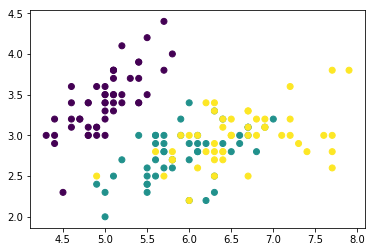

In [57]:
x = df['sepal length (cm)'][:]
y = df['sepal width (cm)'][:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

Podobny efekt moglibyśmy uzyskać korzystając bezpośrednio z metody `plot()` dostarczanej przez `pandas.Series`. W poniższym przykładzie `iloc` oznacza *index localization* i należy wyrażenie rozumieć jako wybór wszystkich wierszy `:` oraz drugiej i trzeciej kolumny `[1,2]` (kolumny są indeksowane od 0).

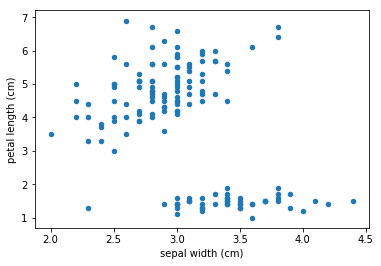

In [58]:
df.iloc[:,[1,2]].plot(kind='scatter', x=0, y=1)

## Normalizacja

Pierwsza operacja to normalizacja liniowa realizowana przez klasę [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler). Klasa ta realizuje następującą transformację atrybutu:

$$v' = \frac{v-min}{max-min} * (max'-min') + min'$$

gdzie $max,min$ to oryginalna wartość maksymalna i minimalna atrybutu, $max',min'$ to wartości maksymalna i minimalna w nowej skali, $v'$ to nowa wartość atrybutu, a $v$ to oryginalna wartość atrybutu.

Ponieważ będziemy tylko przetwarzać atrybuty kwiatów, a nie etykietę (ostatnią kolumnę), więc w pierwszym kroku zapiszemy cztery kolumny z cechami kwiatów (oraz ich nazwy) do osobnych zmiennych.

In [ ]:
X = df.iloc[:, :-1]
cols = df.columns[:-1]

Poniższy kawałek kodu pokazuje, w jaki sposób należy przeprowadzić normalizację całej tabeli z danymi.

In [78]:
norm = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X)
X_minmax = pd.DataFrame(norm.transform(X), columns=cols)

X_minmax.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

In [72]:
X_minmax.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000

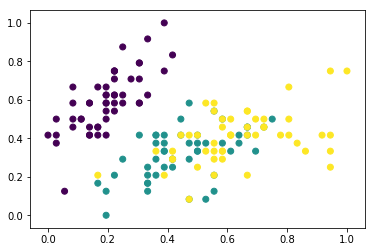

In [74]:
x = X_minmax['sepal length (cm)'][:]
y = X_minmax['sepal width (cm)'][:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

## Standaryzacja

Innym rodzajem normalizacji jest *standaryzacja* zmiennej, tzn. zamiana zmiennej w taki sposób, aby średnia wartość zmiennej wynosiła 0 a jej odchylenie standardowe wynosiło 1. W bibliotece scikit-learn jest to realizowane przez klasę [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) która realizuje następującą transformację:

$$v' = \frac{v-\mu}{\sigma}$$

gdzie $\mu$ to wartość średnia atrybutu, a $\sigma$ to odchylenie standardowe.

In [76]:
scale = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scale.transform(X), columns=cols)

X_scaled.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

In [77]:
X_scaled.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -2.775558e-16     -9.695948e-16      -8.652338e-16   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -4.662937e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00

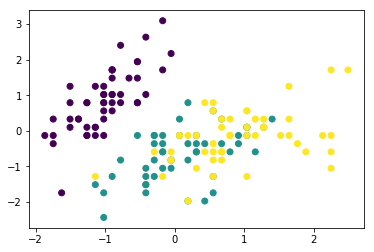

In [79]:
x = X_scaled['sepal length (cm)'][:]
y = X_scaled['sepal width (cm)'][:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

## Dyskretyzacja 

Alternatywą dla ręcznego wskazywania podziału atrybutu na przedziały jest wykorzystanie automatycznego wyliczenia przedziałów przy użyciu klasy [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) która w taki sposób dzieli przestrzeń atrybutu na zadane _k_ przedziałów, aby odległości między środkami geometrycznymi przedziałów były jak największe

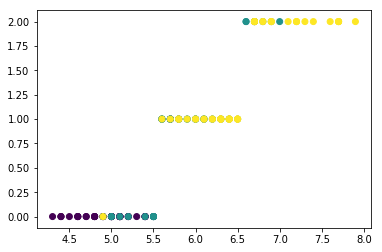

In [80]:
kbin = preprocessing.KBinsDiscretizer(n_bins=3, strategy='kmeans', encode='ordinal').fit(df[['sepal length (cm)']])

df_kbinned = pd.DataFrame(kbin.transform(df[['sepal length (cm)']]))

x = df['sepal length (cm)'][:]
y = df_kbinned[:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

## Binaryzacja

Czasami zachodzi konieczność transformacji atrybutu do postaci flagi binarnej reprezentującej wynik jakiegoś testu logicznego na wartościach atrybutu. Zadanie to realizuje klasa [Binarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html).

In [89]:
binarize = preprocessing.Binarizer(threshold=3).fit(X)

X_binned = pd.DataFrame(binarize.transform(X), columns=cols)

pd.concat([df,X_binned], axis=1).head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0       0                1.0               1.0                0.0   
1       0                1.0               0.0                0.0   
2       0                1.0               1.0                0.0   
3       0                1.0               1.0                0.0   
4       0                1.0               1.0                0.0   

   petal width (cm)  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

## Wyświetlenie histogramów

Do prostego zliczenia wartości w kolumnie można wykorzystać:
- `pandas.Series.value_counts()`
- `collections.Counter`

natomiast jeśli chcemy tylko narysować histogram wartości w kolumnie, wystarczy `pandas.Series.hist()`

In [91]:
X_binned['sepal width (cm)'].value_counts()

0.0    83
1.0    67
Name: sepal width (cm), dtype: int64

In [92]:
from collections import Counter

Counter(X_binned['sepal width (cm)'].values)

Counter({1.0: 67, 0.0: 83})

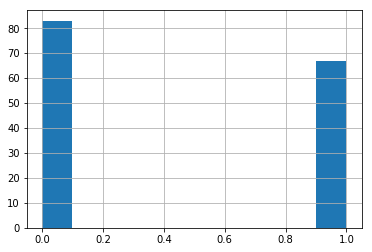

In [95]:
X_binned['sepal width (cm)'].hist()

## Uzupełnienie wartości brakujących

Wartości brakujące mogą poważnie zaburzyć wynik analizy. Wiele algorytmów klasyfikacji i regresji nie akceptuje danych wejściowych, w których występują wartości puste. Klasa [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) pozwala zamienić wartości brakujące na wartość średnią, medianę lub wartość modalną wyznaczaną na podstawie całego atrybutu.

In [96]:
from sklearn.impute import SimpleImputer

matrix = np.array([[ 1, 2, np.nan], [np.nan, 4, 5], [6, np.nan, 7]])

# alternatywne strategie to 'mean', 'median' i 'most_frequent'
imp = SimpleImputer(missing_values=np.nan, strategy='mean').fit(matrix)

print(matrix)
print()
print(imp.transform(matrix))

[[ 1.  2. nan]
 [nan  4.  5.]
 [ 6. nan  7.]]

[[1.  2.  6. ]
 [3.5 4.  5. ]
 [6.  3.  7. ]]


## Kodowanie zmiennej celu

Bardzo często wykorzystywaną klasą jest [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) która zamienia atrybut kategoryczny na flagi binarne. Po transformacji tworzonych jest $k$ flag binarnych, gdzie $k$ to liczba unikanlnych wartości występujących w oryginalnym atrybucie. Wynikiem transformacji jest indeks bitmapowy oryginalnego atrybutu.

In [97]:
df_target = df['target'].values

print(df_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
one_hot = preprocessing.OneHotEncoder(categories='auto').fit(df_target.reshape(-1,1))

one_hot.transform(df_target.reshape(-1,1)).todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [98]:
one_hot.inverse_transform(np.array([[1,0,0]]))

array([[0]])

## zadanie samodzielne

Zapoznaj się z dokumentacją klasy [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) która dokonuje normalizacji pojedynczych instancji w zbiorze uczącym. Dokonaj normalizacji zbioru *Iris*, sprawdzając przy tym, jaki jest efekt zmiany wartości parametru *norm* używanego przy inicjalizacji klasy.

*podpowiedź* : wykorzystaj metodę [DataFrame.sum()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)